#  <font color='red'> Review of 1D Gaussian \& convolution property </font>


In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal


## Set mean and standard deviation and plot the pdf

You may vary the parameters and see how the plots change

The following code represents the equation of Gaussian Distribution:
    $$N(x|\mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}exp(\frac{-\delta^2}{2})$$
where $$\delta = \frac{x-\mu}{\sigma}$$


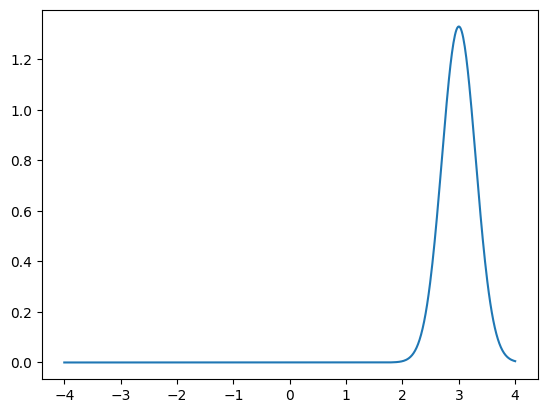

In [3]:
# Parameters of the Gaussian

mu = 3      # mean
sigma = 0.3 # standard deviation

Nsamples = 600  # Sample size
x = np.linspace(-4, 4, Nsamples)    # Hover over "linspace" to see detailed explanation

Delta_squared = np.square((x-mu)/sigma)
P = 1/np.sqrt(2*np.pi*np.square(sigma))*np.exp(-Delta_squared/2)

# Plot of the Gaussian PDF

s=plt.plot(x, P)

## Draw samples from the distribution and plot

See https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

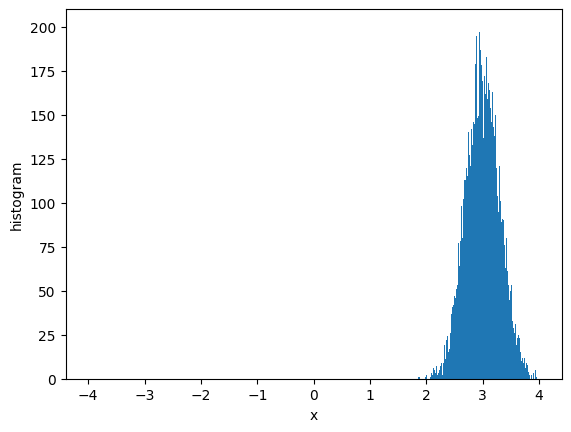

In [4]:
N=10000

s = np.random.normal(mu, sigma, N)
pt = plt.hist(s, bins=x)
pt = plt.xlabel('x')
pt = plt.ylabel('histogram')



##  <font color=blue> Creation of Gaussian via central limit theorem </font>

We will show that the random variable

$$z=x_1+x_2+x_3+.. x_M$$  

tend to a Gaussian pdf as $N\rightarrow \infty$, irrespective of the distribution of $x_i$.

Note that the pdf of $$z=x_1+x_2$$ is given by the convolution

$$p_z(z) = p_{x_1}(x_1)*p_{x_2}(x_2)$$

Thus the sum of several <font color=red>uniform</font> random variables has a pdf given by the convolution of several box functions, which tend to Gaussian as $$M\rightarrow \infty$$

### <font color=red>To do: Verify central limit theorem</font>

<font color=red>Modify the code below to </font>
  
1. <font color=red> Create a matrix with $M$ rows, whose rows correspond to samples of the uniform distribution $x_i$.  </font>
    
2. <font color=red> Sum along the rows to create new random variable z. </font>
    
3. <font color=red>Plot their histogram, Show results for M=1,2,3,5</font>
    
4. <font color=red>  Verify that you get a uniform distribution for M=1, a tent function for M=2, and progressively converging to a Gaussian as M increases</font>

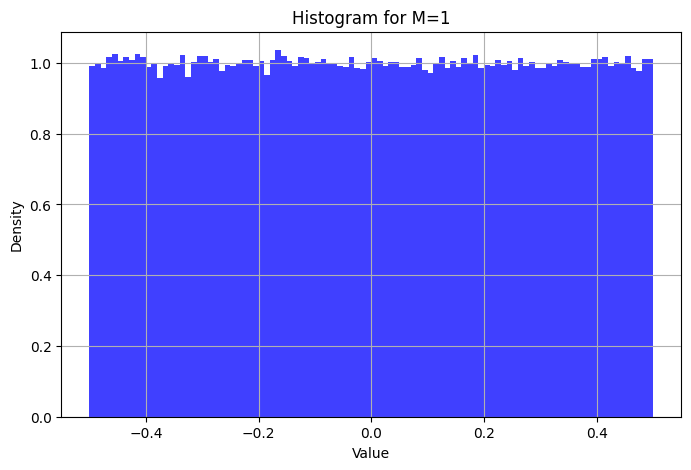

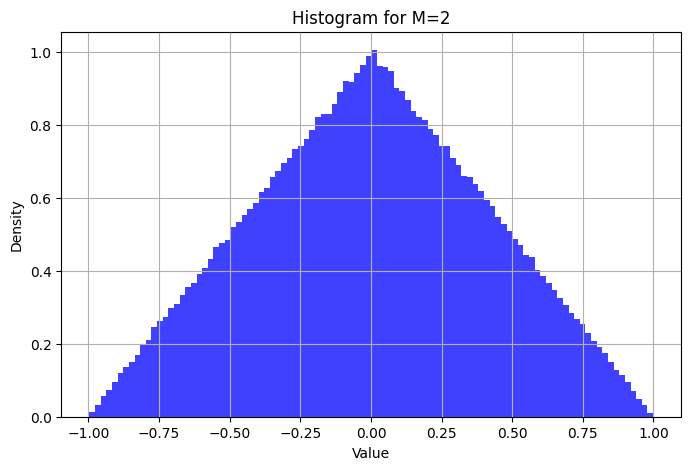

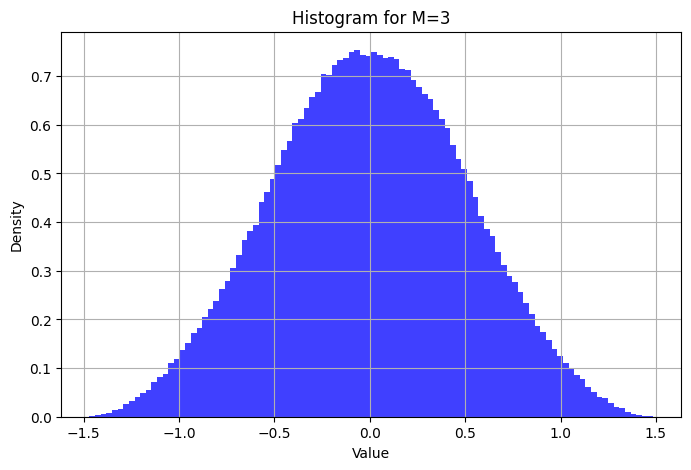

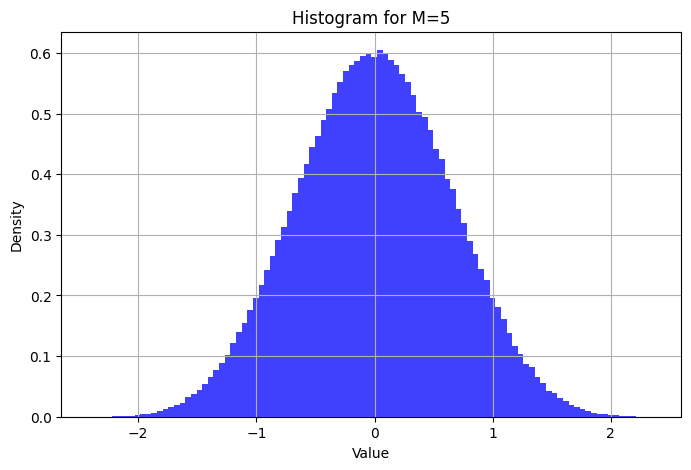

In [17]:


N = 500000
M = 5
s = np.random.uniform(-0.5, 0.5, N)

# Step 1: Create a matrix with M rows
for i in range(1, M+1):
    # Generate a matrix of size (M, N)
    samples = np.random.uniform(-0.5, 0.5, (i, N))
    
    # Step 2: Sum along the rows
    z = np.sum(samples, axis=0)

    # Step 3: Plot the histogram of the summed variable z
    if i in [1, 2, 3, 5]:
        plt.figure(figsize=(8, 5))
        plt.hist(z, bins=100, density=True, alpha=0.75, color='blue')
        plt.title(f'Histogram for M={i}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()